## Interactive acoustic design of a sandwich type sono-microreactor   

This small demonstration shows the intuition behind a proper acoustic design of sono-microreactors.
Efficient power ultrasound in microreactors has been addressed within MAPSYN European project.
[![img](./images/mapsyn.gif)](http://mapsyn.eu)
    
    Author: Francisco José Navarro-Brull
    Supplementary information: Guidelines for the design of efficient sono-microreactors

# Langevin's transducer

Prestressed sandwich transducers, or Langevin's transducers, are frequently applied in the high-power-ultrasound manufacturing industry as narrow-band piezoelectric transducers. Their basic structure consists of one or more pairs of piezoceramic rings, enclosed by metal endings and mechanically compressed by a central bolt. This half-wave resonant structure vibrates in its longitudinal or axial direction. A representation of  the most common Langevin's kind of transducer ---often called symmetrical transducer--- is shown in here:

<p style="text-align:center">

<img src="https://raw.githubusercontent.com/franktoffel/sono-microreactors/master/images/langevin.png" alt="Symmetrical transducer">

Half-wave transducer with same material endings and cross-section areas showing its displacement amplitude ($u$) and mechanical stress ($T$) curves
</p>



Every Langevin's transducer can be divided into its three inherent parts, namely:
* the reflector, representing the back side of the transducer and looking for the maximum reflection of the acoustic wave;
* the actuator, usually made of a lead-zirconomim-titanate ceramic (PZT);
* the emitter, transfering oscillations to the operating medium.

The reflector and emitter are represented with the letters $r$ and $e$, respectively. 
	
Sandwich transducer design and optimization  do necessarily involve different materials and knowledge of mechanics, acoustics and electronics.

# Langevin's equation

Although several one-dimensional approaches can be found in the literature, Langevin's equation constitutes the most frequently applied equation for the design of sandwich transducers. Langevin's equation is widely used due to its simplicity and flexibility. However, it should be only applied provided that the transducer has the same cross-sections at both ends (usually called symmetric transducers). In any case, what all these one-dimensional models have in common is that they enable the possibility of determining the transducer dimensions for a specific resonant frequency by using an equivalent circuit analogy.
In fact, a mechanical system can be described by its electrical analog, and vice-versa. KLM and Mason's models are used to design the transducer by simplifying the wave equation solution in the model. This is possible thanks to an equivalent electrical network representation used for calculating electromechanical parameters.	

Thus, a Langevin-type transducer can be modeled under the following assumptions:
* There are solely plane-wave propagations along the longitudinal section of the reactor, where the tension in the interior of the pieces is evenly distributed throughout its cross section.
* The forces exerted by the back and front ends on the air are considered as negligible and the equivalent circuit is simplified to a single impedance. 

When the system vibrates at the resonance frequency, the impedance of such an equivalent circuit becomes zero, leading to  the next equation for a half-wave  resonant structure of a Langevin-type ultrasonic transducer:

$$
  k_pl_p
  + \tan^{-1}{\left( \frac{Z_r^c}{Z_p^c} \tan{k_r l_r}\right) }
  + \tan^{-1}{\left( \frac{Z_e^c}{Z_p^c} \tan{k_f l_e}\right) }
  = \pi
$$

where $k$ denotes the angular wavenumber (${2 \pi}/{\lambda}$, with $\lambda$ being the wavelength) and $Z$ the acoustic impedance ($\rho c$, with ${\rho}$ being the material density and $c$ the sound velocity) of each section.

The first term of equation from above corresponds to the piezoelectric crystal, and the second and third terms to the back and front side, respectively. Consequently, $l_p$ is the thickness of the piezoelectric material, while $l_r$ is the thickness of the Teflon layer behind the piezo (reflector) and $l_e$ is that of the layer before it (emitter).
It is necessary to define the size of the piezoelectric ceramic because it should be located at a vibration node allowing the division of the transducer  into two sections ---where each one will develop a quarter of the wavelength of the resonator ---. In this way, this equation can be splitted into: 

$$
  k_pl_p
  + \tan^{-1}{\left( \frac{Z_r^c}{Z_p^c} \tan{k_r l_r}\right) }
  = \frac{\pi}{2}   \\
$$

$$
  \tan^{-1}{\left( \frac{Z_e^c}{Z_p^c} \tan{k_f l_e}\right) }
  = \frac{\pi}{2}
$$

Finally, it must be underlined that the two stainless steel chucks closing the microreactor have not been considered in this sizing. The transducer is modeled to have a maximum output at the back side where, due to the impedance differences between Teflon and stainless steel, the transmission of the vibration will be insignificant ($\sim$97\% of reflection). In contrast, on the front side the width of Teflon is designed to have an antinode at the microchannel. The interface between Teflon and stainless steel on the front side will be located at a node, where the vibration is zero and therefore not interfering with the signal. 

What we are going to do is to program in [Python](https://www.python.org/) the solution of these equations and show with [matplotlib](http://matplotlib.org/) and [IPython](http://ipython.org/) the sizing results from the Langevin model applied to the following device:

<p style="text-align:center">

<img src="https://raw.githubusercontent.com/franktoffel/sono-microreactors/master/images/exploded-view.png" alt="Symmetrical transducer">

Representation of the assembly constituting the Teflon-stacked microreactor proposed in the literature (Kuhn et al., 2011)
</p>

In [1]:
# importing the IPython widgets
from ipywidgets import interact

# importing matplotlib and NumPy libraries
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

In [2]:
%matplotlib inline

In [3]:
def plot_response(freq = 50):
    """
    Make a "sandwich" horizontal plot for the Langevin's equation solution
    """
    
    # Working parameters
    frequency = freq*1e3 # [Hz]
    
    rho_PZT = 7750 # [kg/m^3]
    rho_PTFE = 2200 # [kg/m^3]
    
    w_steel = 75 *1e-3 # [m] width of the SSteel chucks 
    w_PZT   = 60.5 *1e-3# [m] width of PZT the actuator  
    w_PTFE  =  70.5 *1e-3# [m] width of the PTFE 
    w_microtube = 10 *1e-3# [m] width of the microchannel 
    
    area_PZT = w_PZT**2 # [m^2] (squared geometry)
    area_PTFE = w_PTFE**2 # [m^2] (squared geometry)
    
    elastic_constant_PZT = 1.35e-11 # [Pa^-1] (S^{D}_{33})

    young_PZT = 7e10 # [Pa]
    young_PTFE = 4e8 # [Pa]
    
    # Calculations
    
    v_sound_PZT = 1 / (rho_PZT*elastic_constant_PZT)**0.5 # [m/s]
    
    v_sound_PTFE = (young_PTFE/rho_PTFE)**0.5 # [m/s]
    
    k_PZT = 2*np.pi*frequency / v_sound_PZT
    k_PTFE = 2*np.pi*frequency / v_sound_PTFE
    
    Z_PZT = v_sound_PZT*area_PZT*rho_PZT
    Z_PTFE = v_sound_PTFE*area_PTFE*rho_PTFE
    
    l_PZT = 1.02e-3 # length of the PZT [m]
    
    l_back = np.abs( np.arctan( np.tan( np.pi/2 - k_PZT*l_PZT) 
                       * Z_PZT/Z_PTFE) * 1/k_PTFE) #[m]
    l_front = np.arctan( np.tan(np.pi/2) * Z_PZT/Z_PTFE) * 1/k_PTFE
    
    
    l_steel = 6e-3 # length given for the SSteel chucks [mm]
    
    
    # Plotting results (end of calculations)
    
    fig, ax = plt.subplots()
    
    plt.title("Langevin's equation results - "+"$f:$"+str(frequency/1e3)+"kHz")
    # broken_bar plotting works as follows       
    # ax.broken_barh([x left down corner, length],(y left down corner, heigth))
    
    # [Back, Housing, Front]
    
    y_axisymmetry = -w_PZT/2
    PTFE_x_coordinates = [(-l_back, l_back),(0, l_PZT),(l_PZT, l_front),(l_PZT+l_front, l_front)]
    ax.broken_barh(PTFE_x_coordinates, (-w_PTFE/2, w_PTFE), facecolors='grey')
    
    #The PZT actuaor
    ax.broken_barh([(0, l_PZT)], (-w_PZT/2, w_PZT), facecolors='orange')
    
    
    # Steel chucks part [Back, Front]
    steel_x_coordinates = [(-(l_back+l_steel),l_steel),(l_PZT+l_front*2,l_steel)]
    ax.broken_barh(steel_x_coordinates, (-w_steel/2, w_steel), facecolors='white')
    
    #  Reaction tube
    w_reactube = w_PZT
    l_reactube =  0.6 *1e-3 # [m]
    reactube_x_coordinates = [((l_PZT+l_front-l_reactube/2), l_reactube)]
    ax.broken_barh(reactube_x_coordinates, (-w_reactube/2, w_reactube), facecolors='blue')
    
    l2 = plt.legend()
    
    k_graph_PTFE = 2*np.pi*frequency/v_sound_PTFE
    k_graph_PZT = 2*np.pi*frequency/v_sound_PZT
    
    x_back = np.linspace(-l_back-l_PZT, 0)
    wave_lenght_back = (l_back+l_PZT)*4
    y_back = 0.01* np.sin((2*np.pi)/wave_lenght_back*(x_back))
    
    x_front = np.linspace(l_PZT,l_PZT+l_front*2)
    y_front = 0.01* np.sin(k_graph_PTFE*(x_front-l_PZT))

    ax.plot(x_back+l_PZT,y_back,'-k',linewidth=3, label="Displacement: $u$")
    ax.plot(x_front,y_front,'-k',linewidth=3)
    

    ax.plot(x_back+l_PZT,-y_back,'--k',linewidth=3, label="standing wave")
    ax.plot(x_front,-y_front,'--k',linewidth=3)
    ax.legend()
    
    ax.set_xlabel('x / m')
    ax.set_ylabel('axis of symmetry')
    ax.set_yticks([0])
    ax.set_yticklabels([0])
    ax.grid(True)
    
    
    bars_PTFE = plt.Rectangle((0, 0), 1, 1, fc="grey")
    bars_PZT = plt.Rectangle((0, 0), 1, 1, fc="orange")
    bars_water = plt.Rectangle((0, 0), 1, 1, fc="blue")
    bars_ss = plt.Rectangle((0, 0), 1, 1, fc="white")

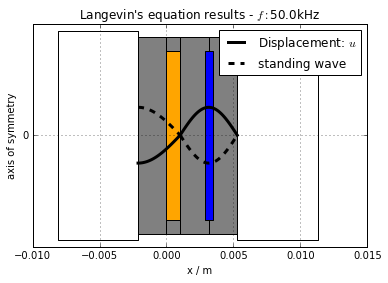

In [4]:
# Call the interactive slider
# working frequency between 30 and 70 kHz
interact(plot_response, freq=(30,70))

Proper sizing is needed as a function of the driving frequency. The black and dashed lines represent a (standing) planar acoustic wave. Transducer is colored in orange and microchanel in blue. Stainless steel and PTFE are colored in white and grey, respectively.

Output example for the HTML static version:

<p style="text-align:center">

<img src="https://raw.githubusercontent.com/franktoffel/sono-microreactors/master/animations/langevins-interative-python.gif" alt="Interactive Langevin">

</p>
